### Этап I. Предобработка

In [276]:
# Импорт библиотек
import pandas as pd
import numpy as np
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt

In [277]:
# Чтение датасета
df = pd.read_csv('data/data.csv', sep=';')
display(df.head(3))
df.info()

,ID истории болезни,Осн. диаг. при выписке МКБ10 (текст),Заголовок документа,Кол. лаб. показатель,Значение кол. показателя,Ед. изм. кол. показателя,Норма кол. показателя,Флаг нормы кол. показателя,Кач. лаб. показатель,Значение кач. показателя,Норма кач. показателя,Пол,Дата рождения пациента
0,2e1d0b3f-488a-11ed-ab5a-0050568844e6,Плазмоклеточный лейкоз,Общий анализ крови,Лейкоциты (WBC),1.80,10*9/л,4:11,Пониж,NaN,NaN,NaN,Ж,1962-09-22 00:00:00
1,2e1d0b3f-488a-11ed-ab5a-0050568844e6,Плазмоклеточный лейкоз,Общий анализ крови,Эритроциты (RBC),4.18,10*12/л,"3,8:5,7",Норм,NaN,NaN,NaN,Ж,1962-09-22 00:00:00
2,2e1d0b3f-488a-11ed-ab5a-0050568844e6,Плазмоклеточный лейкоз,Общий анализ крови,Гемоглобин (HGB),120.00,г/л,117:160,Норм,NaN,NaN,NaN,Ж,1962-09-22 00:00:00


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36297 entries, 0 to 36296
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   ID истории болезни                    36297 non-null  object 
 1   Осн. диаг. при выписке МКБ10 (текст)  36297 non-null  object 
 2   Заголовок документа                   36297 non-null  object 
 3   Кол. лаб. показатель                  36236 non-null  object 
 4   Значение кол. показателя              36236 non-null  float64
 5   Ед. изм. кол. показателя              36236 non-null  object 
 6   Норма кол. показателя                 36236 non-null  object 
 7   Флаг нормы кол. показателя            36236 non-null  object 
 8   Кач. лаб. показатель                  7005 non-null   object 
 9   Значение кач. показателя              7005 non-null   object 
 10  Норма кач. показателя                 7005 non-null   object 
 11  Пол            

In [278]:
# Удаляем неинформативные столбцы
print(f'Всего уникальных значений в Заголовке документа: {df["Заголовок документа"].nunique()}')
df = df.drop('Заголовок документа', axis=1)

Всего уникальных значений в Заголовке документа: 1


Кодируем пол:
 - женский (Ж) - 0
 - мужской (М) - 1

In [279]:
# Заменяем значения в столбце 'пол'
df['Пол'] = df['Пол'].map({'Ж': 0, 'М': 1})

Рассчитываем возраст пациентов на момент 09.11.2024

In [280]:
# Преобразуем столбец 'Дата рождения' в datetime-формат
df['Дата рождения пациента'] = pd.to_datetime(df['Дата рождения пациента'])
target_date = datetime(2024, 11, 9)

# Расчет возраста в годах
df['Возраст'] = (df['Дата рождения пациента'].apply(lambda x: (target_date - x).days)) // 365

# Удаляем столбец с датой рождения 
df = df.drop('Дата рождения пациента', axis=1)

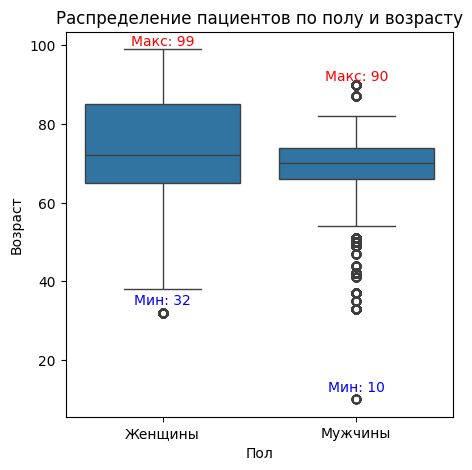

In [281]:
# Создаем боксплот распределения пациентов по полу и возрасту
plt.figure(figsize=(5, 5))
ax = sns.boxplot(x='Пол', y='Возраст', data=df)

plt.title('Распределение пациентов по полу и возрасту')
plt.xlabel('Пол')
plt.ylabel('Возраст')
plt.xticks(ticks=[0, 1], labels=['Женщины', 'Мужчины'])

# Подписываем минимальный и максимальный возраст для каждой подгруппы
for sex in df['Пол'].unique():
    subset = df[df['Пол'] == sex]
    min_age = subset['Возраст'].min()
    max_age = subset['Возраст'].max()
    
    x = 0 if sex == df['Пол'].unique()[0] else 1
    y_min = min_age + 2  
    y_max = max_age + 1 

    ax.annotate(f'Мин: {min_age}', xy=(x, min_age), xytext=(x, y_min), ha='center', color='blue')
    ax.annotate(f'Макс: {max_age}', xy=(x, max_age), xytext=(x, y_max), ha='center', color='red')

plt.show()

In [282]:
# Удаляем пациентов, младше 18 лет (детей)
num_patients_under_18 = df[df['Возраст'] < 18].shape[0]
print(f'Количество пациентов, младше 18 лет: {df[df["Возраст"] < 18]["ID истории болезни"].nunique()}')
df = df[df['Возраст'] >= 18]

Количество пациентов, младше 18 лет: 1


Наглядный пример того, что у одного пациента может быть несколько анализов крови

In [283]:
df[(df['ID истории болезни'] == '2e1d0b3f-488a-11ed-ab5a-0050568844e6') & (df['Кол. лаб. показатель'] == 'Лейкоциты (WBC)')]

,ID истории болезни,Осн. диаг. при выписке МКБ10 (текст),Кол. лаб. показатель,Значение кол. показателя,Ед. изм. кол. показателя,Норма кол. показателя,Флаг нормы кол. показателя,Кач. лаб. показатель,Значение кач. показателя,Норма кач. показателя,Пол,Возраст
0,2e1d0b3f-488a-11ed-ab5a-0050568844e6,Плазмоклеточный лейкоз,Лейкоциты (WBC),1.80,10*9/л,4:11,Пониж,NaN,NaN,NaN,0,62
16,2e1d0b3f-488a-11ed-ab5a-0050568844e6,Плазмоклеточный лейкоз,Лейкоциты (WBC),1.07,10*9/л,4:11,Пониж,NaN,NaN,NaN,0,62
46,2e1d0b3f-488a-11ed-ab5a-0050568844e6,Плазмоклеточный лейкоз,Лейкоциты (WBC),1.89,10*9/л,4:11,Пониж,NaN,NaN,NaN,0,62
76,2e1d0b3f-488a-11ed-ab5a-0050568844e6,Плазмоклеточный лейкоз,Лейкоциты (WBC),4.97,10*9/л,4:11,Норм,NaN,NaN,NaN,0,62
104,2e1d0b3f-488a-11ed-ab5a-0050568844e6,Плазмоклеточный лейкоз,Лейкоциты (WBC),1.64,10*9/л,4:11,Пониж,NaN,NaN,NaN,0,62
134,2e1d0b3f-488a-11ed-ab5a-0050568844e6,Плазмоклеточный лейкоз,Лейкоциты (WBC),3.80,10*9/л,4:11,Пониж,NaN,NaN,NaN,0,62
226,2e1d0b3f-488a-11ed-ab5a-0050568844e6,Плазмоклеточный лейкоз,Лейкоциты (WBC),1.62,10*9/л,4:11,Пониж,NaN,NaN,NaN,0,62
251,2e1d0b3f-488a-11ed-ab5a-0050568844e6,Плазмоклеточный лейкоз,Лейкоциты (WBC),5.03,10*9/л,4:11,Норм,NaN,NaN,NaN,0,62
279,2e1d0b3f-488a-11ed-ab5a-0050568844e6,Плазмоклеточный лейкоз,Лейкоциты (WBC),16.70,10*9/л,4:11,Повыш,NaN,NaN,NaN,0,62
298,2e1d0b3f-488a-11ed-ab5a-0050568844e6,Плазмоклеточный лейкоз,Лейкоциты (WBC),1.70,10*9/л,4:11,Пониж,NaN,NaN,NaN,0,62


Смотрим, почему могли быть незаполнены показатели крови:

In [284]:
# Выборка с пропущенными значениями по столбцу Кол. лаб. показатель
df_na = df[df["Кол. лаб. показатель"].isna()]
print(f'Всего строк с пропусками по показателям крови: {df_na.shape[0]}')
print(f'Комментарии: {df_na["Кач. лаб. показатель"].unique()}')
print(f'Причины в комментариях: {df_na["Значение кач. показателя"].unique()}')

Всего строк с пропусками по показателям крови: 61
Комментарии: ['Комментарий']
Причины в комментариях: ['сгусток крови!' 'Сгусток' 'сгусток крови'
 'тромбоциты по мазку 81х10*9/л' ' тромбоциты по мазку 23*10*9/л'
 'тромбоциты по мазку 21' 'формулу подсчитать невозможно'
 'тромбоциты пртоверены' 'встречаются микросгустки тромбоцитов' 'сгусток'
 'тромбоциты проверены по мазку'
 'шизоциты 4:1000 эритроцитов(№до 10:1000) ' 'нет на месте'
 'тромбоциты при подсчете по мазку 102' ',' 'ТРОМЮОЦИТЫ ПРОВЕРЕНЫ'
 'тромбоциты проверены' 'Тромбоциты проверены.' 'сгусток в крови'
 'тромбоциты по мазку 64*10*9/Л' 'Тромбоциты проверены\t' 'тромб.пров'
 'СОЭ - 7 мм/ч'
 'Лейкоциты после пересчета (без учета нормобластов) - 14,4х10х9/л. Тромбоциты проверены.  Моноцитоидные элементы отличаются полимрфизмом ядер,  наличием зернистости в цитоплазме , высоким ядерноцитоплазматическим соотношением .'
 'подсчитано 50 клеток, моноцитоидные элементы -16'
 'моноцитарные элементы с нуклеолами в ядре 63,5'
 'Тромбоци

Таким образом, где у нас написано в комментарии, что невозможно определить тот или иной показатель и при этом в Кол. лаб. показателе стоит пропуск, эти строки надо удалить, так как мы уже не сможем определить, что это был за показатель изначально (так как там стоит NaN). 

Если по комментарию можно восстановить и заполнить показатель, например, как в случае  'СОЭ - 7 мм/ч' или 'тромбоциты по мазку 64*10*9/Л', то такие строки оставляем и восстанавливаем значения 

In [285]:
# Значения по столбцу "Значение кач. показателя", которые нужно удалить
values_to_delete = ['сгусток крови!', 'Сгусток', 'сгусток крови',
                    'формулу подсчитать невозможно', 'встречаются микросгустки тромбоцитов',
                    'сгусток', 'нет на месте', 'сгусток в крови', 'лейкоцитарную формулу подсчитать невозможно',
                    'подсчет л/ф невозможен', ',', 'тромбоциты пртоверены', 
                    'тромбоциты проверены по мазку', 'ТРОМЮОЦИТЫ ПРОВЕРЕНЫ', 'тромбоциты проверены', 
                    'Тромбоциты проверены.', 'Тромбоциты проверены\t', 'тромб.пров',
                    'моноцидоидные элементы с грубой структурой хроматина и остатаками нуклеол',
                    'Тромбоциты проверены.  Подсчет лейкоцитарной формулы невозможен из-за  крайне низкого колическва лейкоцитов крови.']

print(f'Всего таких строк: {df_na[df_na["Значение кач. показателя"].isin(values_to_delete)].shape[0]}')
# Удаляем строки с пропусками по столбцу с показателями и с выделенными выше значениями в комментриях
df = df[~(df['Кол. лаб. показатель'].isna() & df['Значение кач. показателя'].isin(values_to_delete))]

Всего таких строк: 45


Теперь восстанавливаем утраченные значения столбца "Значение кач. показателя" из текста комментария:

In [286]:
# Смотрим оставшиеся значения комментраиев
df[df["Кол. лаб. показатель"].isna()]["Значение кач. показателя"].unique()

array(['тромбоциты по мазку 81х10*9/л', ' тромбоциты по мазку 23*10*9/л',
       'тромбоциты по мазку 21',
       'шизоциты 4:1000 эритроцитов(№до 10:1000) ',
       'тромбоциты при подсчете по мазку 102',
       'тромбоциты по мазку 64*10*9/Л', 'СОЭ - 7 мм/ч',
       'Лейкоциты после пересчета (без учета нормобластов) - 14,4х10х9/л. Тромбоциты проверены.  Моноцитоидные элементы отличаются полимрфизмом ядер,  наличием зернистости в цитоплазме , высоким ядерноцитоплазматическим соотношением .',
       'подсчитано 50 клеток, моноцитоидные элементы -16',
       'моноцитарные элементы с нуклеолами в ядре 63,5',
       'Тромбоциты проверены. Большинство бластных клеток представляет собой клетки крупных и средних размеров, с высоким ядерно-цитоплазматическим соотношением, уродливыми ядрами (неправильной формы ядра). хроматин сглаженный, встречаются нуклеолы. Цитоплазма у части клеток вакуолизированная. ',
       'моноцитойдн элемент49', 'моноцитраные элементы - 60',
       'бласты 59 ( моноц

In [287]:
remained_values = df[df["Кол. лаб. показатель"].isna()]["Значение кач. показателя"].unique()
print(f'Всего строк для исправления: {df[df["Значение кач. показателя"].isin(remained_values)].shape[0]}')
df[df['Значение кач. показателя'].isin(remained_values)]

Всего строк для исправления: 16


,ID истории болезни,Осн. диаг. при выписке МКБ10 (текст),Кол. лаб. показатель,Значение кол. показателя,Ед. изм. кол. показателя,Норма кол. показателя,Флаг нормы кол. показателя,Кач. лаб. показатель,Значение кач. показателя,Норма кач. показателя,Пол,Возраст
2378,b36a2106-4308-11ed-ab5a-0050568844e6,Хронический лимфоцитарный лейкоз,NaN,NaN,NaN,NaN,NaN,Комментарий,тромбоциты по мазку 81х10*9/л,_,1,77
5609,eebeb925-9f8e-11ec-ab54-0050568844e6,Другой уточненный лейкоз,NaN,NaN,NaN,NaN,NaN,Комментарий,тромбоциты по мазку 23*10*9/л,_,1,68
5610,eebeb925-9f8e-11ec-ab54-0050568844e6,Другой уточненный лейкоз,NaN,NaN,NaN,NaN,NaN,Комментарий,тромбоциты по мазку 21,_,1,68
14713,a6cc0de1-ac03-11ec-ab54-0050568844e6,Другой уточненный лейкоз,NaN,NaN,NaN,NaN,NaN,Комментарий,шизоциты 4:1000 эритроцитов(№до 10:1000),_,1,66
17789,7b9025cb-ae7c-11ec-ab54-0050568844e6,Другой уточненный лейкоз,NaN,NaN,NaN,NaN,NaN,Комментарий,тромбоциты при подсчете по мазку 102,_,0,72
22833,268d2f6a-32ae-11ea-80c5-901b0e633689,Другой уточненный лейкоз,NaN,NaN,NaN,NaN,NaN,Комментарий,тромбоциты по мазку 64*10*9/Л,_,0,86
25849,81f895b9-2ee2-11eb-80e0-901b0e633689,Другой миелоидный лейкоз,NaN,NaN,NaN,NaN,NaN,Комментарий,СОЭ - 7 мм/ч,_,1,50
27046,72f64027-6cf5-11ea-80ce-901b0e63368b,Острый миелоидный лейкоз,NaN,NaN,NaN,NaN,NaN,Комментарий,Лейкоциты после пересчета (без учета нормоблас...,_,0,61
27047,72f64027-6cf5-11ea-80ce-901b0e63368b,Острый миелоидный лейкоз,NaN,NaN,NaN,NaN,NaN,Комментарий,"подсчитано 50 клеток, моноцитоидные элементы -16",_,0,61
27198,72f64027-6cf5-11ea-80ce-901b0e63368b,Острый миелоидный лейкоз,NaN,NaN,NaN,NaN,NaN,Комментарий,"моноцитарные элементы с нуклеолами в ядре 63,5",_,0,61


# Как можно продолжить: 

Например, есть значение 'тромбоциты по мазку 81х10*9/л', соответственно, мы можем заполнить пропуски по столбцу Кол. лаб. показатель - Тромбоциты, Значение кол. показателя	- 81, Ед. изм. кол. показателя - 10 *9/л

И так далее с другими примерами.

Непонятные строки, типа  'шизоциты 4:1000 эритроцитов(№до 10:1000) ', 'бласты 59 ( моноцитоидные)',, пока оставьте, я потом подумаю, как их отметить или убрать (может сделаем столбец, который будет сигнализировать, есть ли бласты)

In [288]:
# Продолжение

Далее смотрим, какие значения есть по столбцам

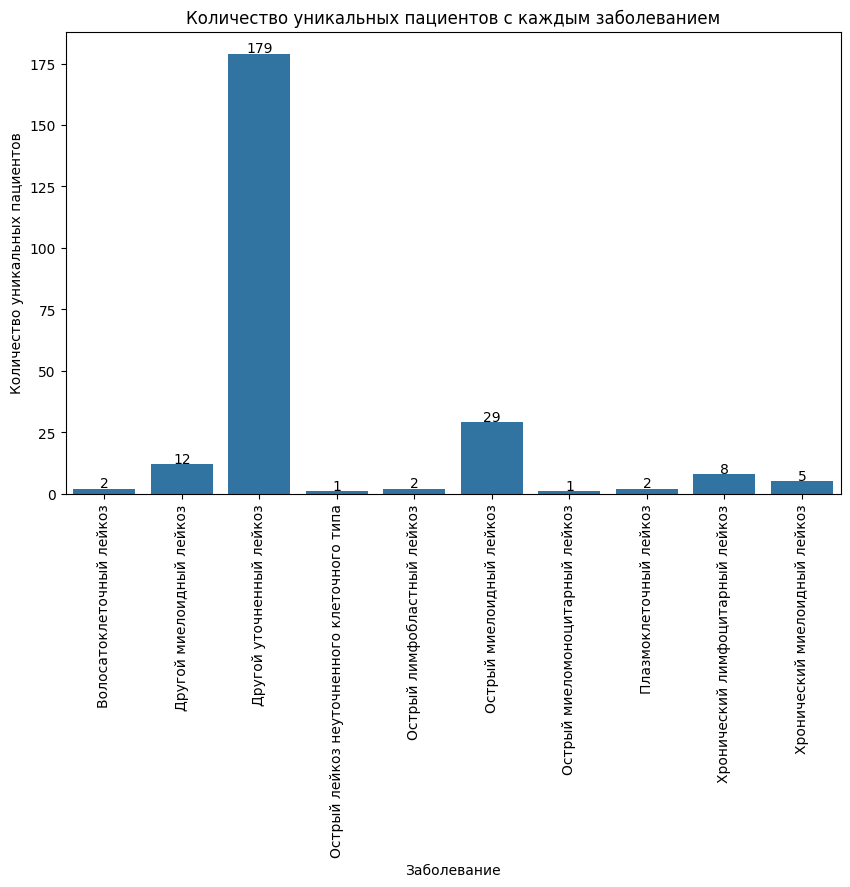

In [289]:
# Просто график для наглядности
# Считаем количество уникальных пациентов с каждым заболеванием
unique_patient_counts = df.groupby('Осн. диаг. при выписке МКБ10 (текст)')['ID истории болезни'].nunique()

plt.figure(figsize=(10, 6))
ax = sns.barplot(x=unique_patient_counts.index, y=unique_patient_counts.values)
plt.title('Количество уникальных пациентов с каждым заболеванием')
plt.xlabel('Заболевание')
plt.ylabel('Количество уникальных пациентов')
plt.xticks(rotation=90)
for i, value in enumerate(unique_patient_counts.values):
    ax.text(i, value + 0.5, str(value), ha='center')

plt.show()

In [290]:
print(f'Всего пациентов в датасете: {df["ID истории болезни"].nunique()}')
print()
print(f'Всего заболеваний (диагнозов): {df["Осн. диаг. при выписке МКБ10 (текст)"].nunique()}')
print(df["Осн. диаг. при выписке МКБ10 (текст)"].unique())
print()
print(f'Всего показателей крови в ОАК: {df["Кол. лаб. показатель"].nunique()}')
print(df["Кол. лаб. показатель"].unique())
print()
print(f"Уникальные значения флагов показателей: {df['Флаг нормы кол. показателя'].unique()}")
print()
print(f"Уникальные значения столбца Качественные лаб. показатели: {df['Кач. лаб. показатель'].unique()}")
print()

Всего пациентов в датасете: 241

Всего заболеваний (диагнозов): 10
['Плазмоклеточный лейкоз' 'Другой уточненный лейкоз'
 'Острый лимфобластный лейкоз' 'Хронический лимфоцитарный лейкоз'
 'Волосатоклеточный лейкоз' 'Острый миелоидный лейкоз'
 'Хронический миелоидный лейкоз' 'Острый миеломоноцитарный лейкоз'
 'Другой миелоидный лейкоз' 'Острый лейкоз неуточненного клеточного типа']

Всего показателей крови в ОАК: 131
['Лейкоциты (WBC)' 'Эритроциты (RBC)' 'Гемоглобин (HGB)'
 'Гематокрит (HCT)' 'Средний объем эритроцита (MCV)'
 'Среднее содержание гемоглобина в эритроците (MCH)'
 'Средняя концентрация гемоглобина в эритроците (MCHC)' 'Тромбоциты (PLT)'
 'Нейтрофилы, относительное количество (NE%)'
 'Лимфоциты, относительное количество (LY%)'
 'Нейтрофилы, абсолютное количество (NE#)'
 'Лимфоциты, абсолютное количество (LY#)'
 'Смешанная фракция, абсолютное количество (MXD#)'
 'Смешанная фракция, относительное количество (MXD%)'
 'Ширина распределения эритроцитов по объему, коэффициент вари

Тут видно, что есть разные формы записи, например, 'Лейкоциты (WBC)' и 'WBC', или 'Моноциты, относительное количество' и 'Моноциты, относительное количество (MO%)'. Для начала нужно удостовериться, что единицы измерения у одних и тех же показателей одни и те же и только потом дать общее название этим одинаковым показателям. 
И далее один из вариантов:
1) Если единицы измерения одинаковые, то есть вот например у 'Эритроциты', 'Эритроциты (RBC)' и 'RBC' скорее всего должно быть единицы измерения 10*12/л, тогда эти значения нужно объединить, чтобы они назывались 'Эритроциты (RBC)'. 
2) Если единицы измерения разные, как может быть с гемоглобином (г/л или г/дл), то необходимо показатель с г/дл перевести в г/л (там просто просто умножить на 10 и будет г/л). Абсолютные и относительные величины не надо трогать (Например, относительное содержание моноцитов в процентах и абсолютное содержание моноцитов)
3) Если единицы измерения на разных языках, то по-хорошему тоже лучше исправить, чтобы было одно значение. Например, параметр MCV измеряется в фл и FL, это одно и то же 
4) Что делать с СОЭ, которое просто тупо разными методами считалось (по Вестергену и Панченкову или просто без указания метода), хз. Думаю, для него в будущем можно оставить только метку повышено/норма/понижено и хватит. Но может эти методы можно уравнять, это надо чекнуть по единицам измерения, чтоб они примерно были одинаковые.

In [291]:
parameter_measure = result = df.groupby('Кол. лаб. показатель')[['Ед. изм. кол. показателя', 'Норма кол. показателя']].agg(lambda x: x.unique().tolist())
parameter_measure.head(20)


,Ед. изм. кол. показателя,Норма кол. показателя
Кол. лаб. показатель,,
BA%,[%],[0:2]
EO%,[%],[0:5]
HCT,[%],"[39:52, 35:47, 35:52, 34:46, 30.0:49.5]"
HGB,[г/л],"[132:180, 117:160, 117:180, 117:140, 114:154, ..."
LY%,[%],[18:44]
MCH,[пг],"[27:38, 26.5:35.5, 26,5:35,5, 26.0:35.0]"
MCHC,"[г/дл, г/л]","[30:38, 300:380, 32.2:35.6, 32,2:35,6, 32.0:36.4]"
MCV,"[фл, FL]","[80:99, 78:103]"
MO%,[%],[2:12]
